In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
df1 = pd.read_csv('Mapped_Final.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High'])
print(df1.describe())
df1.head(15)

         News_Label   Twitt_Label        Volume
count  32418.000000  32418.000000  32418.000000
mean       0.032667      0.073724      2.228470
std        0.214564      0.263910     12.354142
min       -1.000000     -2.000000      0.000000
25%        0.000000      0.000000      0.002718
50%        0.000000      0.000000      0.082848
75%        0.000000      0.000000      1.076639
max        1.000000      1.000000    350.203804


,News_Label,Twitt_Label,Volume
0,0,0,0.005533
1,0,0,0.005533
2,0,0,0.005533
3,0,0,0.005533
4,0,0,0.005533
5,0,0,0.005533
6,0,0,0.005533
7,0,0,0.005533
8,0,0,0.005533
9,0,0,0.005533


In [9]:
# print(df1.tail())
# df1.drop(df1.tail(1).index,inplace=True)
y1 = pd.read_csv('Mapped_Final_Output.csv',index_col=False,usecols=['High'])
y1.head()
# y1.drop(y1.head(1).index,inplace=True)

,High
0,6394.98
1,6394.98
2,6394.98
3,6394.98
4,6394.98


In [10]:
def display(reg,Y_train,Y_test,Y_predict,X_train):
    print(reg.feature_importances_)
    feature_imp = pd.Series(reg.feature_importances_,index=X_train.columns)
    feature_imp.plot(kind='barh',figsize=(7,6))
    print("Mean absolute error :",metrics.mean_absolute_error(Y_test,Y_predict))
    print("Mean squared error :",metrics.mean_squared_error(Y_test,Y_predict))
    print("Root mean square error :",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)),"\n")
    
    y_oob = reg.oob_prediction_
#     print("C stat :",metrics.roc_auc_score(Y_train,y_oob))

In [11]:
def fit_model(df,y):
    X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size = 0.3)
#     train_size = int(len(df)*0.7)
#     test_size = int(len(df)*0.3)
#     print(train_size,test_size)
#     X_train,Y_train,X_test,Y_test = df[0:train_size],y[0:train_size],df[train_size:len(df1)],y[train_size:len(df1)]
    reg = RandomForestRegressor(n_estimators=1000,oob_score=True)
    reg.fit(X_train,Y_train)
    Y_predict = reg.predict(X_test)
    print('Cross validation on training data,',reg.score(X_train,Y_train))
    print('Cross validation on testing data,',reg.score(X_test,Y_test))
    
    display(reg,Y_train,Y_test,Y_predict,X_train)
    return reg,X_train,Y_train,Y_test,Y_predict

## High value

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Cross validation on training data, 0.7790317781767543
Cross validation on testing data, 0.7083302539854084
[0.02834916 0.01488065 0.9567702 ]
Mean absolute error : 16.565919080801013
Mean squared error : 1286.1597713447723
Root mean square error : 35.86306974235156 

[-0.73986224 -0.95439333 -0.80078485 -0.81178007 -0.76593449]


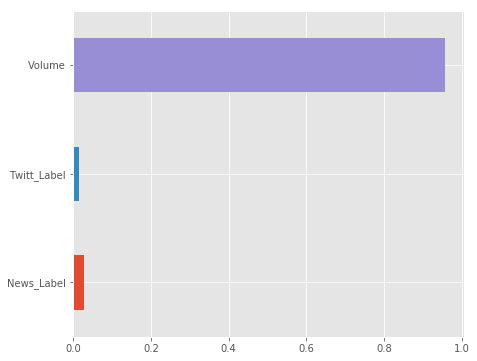

In [12]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df1,y1)

# X_train = df1[0:,:],
# print(X_train)
scores = cross_val_score(reg,df1,y1.values.ravel(),cv = 5)
print(scores)
# for i in range(10):
#     reg,Y_test,Y_predict = fit_model(df,y1)
#     print(np.mean(Y_predict))
# np.unique(Y_predict[1])
# print(reg.oob_score_)

Text(0.5, 1.0, '1 Day')

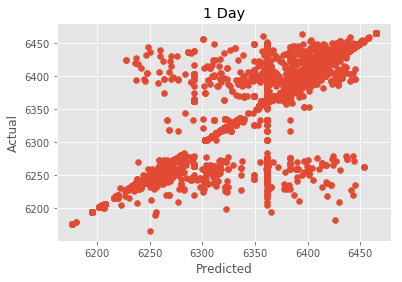

In [13]:
plt.scatter(Y_predict,Y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("1 Day")

In [8]:
Y_test.reset_index(inplace=True,drop=True)
print(Y_predict[0:10])
print(Y_test.head(10))

[6463.         6456.20132178 6410.9523     6381.27559931 6374.57386
 6399.82       6404.75       6216.27787    6410.00887741 6418.01      ]
      High
0  6463.00
1  6456.48
2  6435.51
3  6381.05
4  6374.56
5  6399.82
6  6404.75
7  6213.63
8  6410.01
9  6418.01


Text(0.5, 0, 'Level')

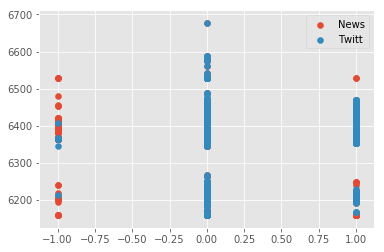

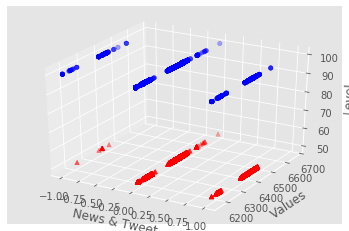

In [21]:
#Input volume and twitt relation with output
plt.scatter(X_train.News_Label,Y_train.High,label = "News")
plt.scatter(X_train.Twitt_Label,Y_train.High, label = "Twitt")
plt.legend()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.News_Label, Y_train.High,100, c='b', marker='o')
ax.scatter(X_train.Twitt_Label,Y_train.High,50,c = 'r',marker = '^')
ax.set_xlabel("News & Tweet")
ax.set_ylabel("Values")
ax.set_zlabel("Level")

Text(0, 0.5, 'Testing')

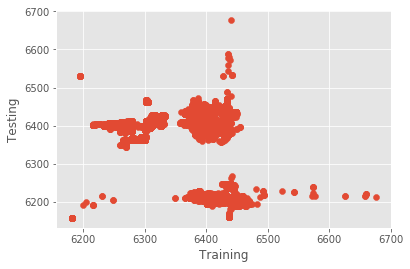

In [22]:
#Historical with output
plt.scatter(X_train.High,Y_train.High)
plt.xlabel("Training")
plt.ylabel("Testing")

In [23]:
print(Y_predict[0:10])
print(Y_test.head(10))

[6397.92       6439.49       6218.98       6367.66239652 6456.27407415
 6364.5        6424.80832142 6410.01       6379.56543    6200.03354   ]
      High
0  6397.92
1  6439.49
2  6218.98
3  6365.00
4  6456.48
5  6364.50
6  6425.00
7  6410.01
8  6397.22
9  6194.42


In [24]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())])
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

0.04292586734148062
0.0011089081172815521


       High    Predicted
0   6397.92  6397.920000
1   6439.49  6439.490000
2   6218.98  6218.980000
3   6365.00  6367.662397
4   6456.48  6456.274074
5   6364.50  6364.500000
6   6425.00  6424.808321
7   6410.01  6410.010000
8   6397.22  6379.565430
9   6194.42  6200.033540
10  6410.01  6410.010000
11  6416.81  6416.810000
12  6391.68  6391.756260
13  6386.48  6386.480000
14  6404.33  6404.330000
15  6401.98  6400.688400
16  6368.29  6368.290000
17  6419.00  6419.000000
18  6425.55  6425.550000
19  6449.00  6449.000000


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


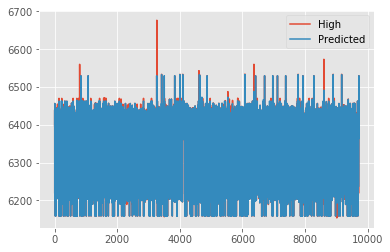

In [25]:
Y_test['Predicted'] = Y_predict
print(Y_test.head(20))
Y_test.plot()
plt.show()

In [26]:
Y_test.describe()

,High,Predicted
count,9726.000000,9726.000000
mean,6376.877141,6376.806427
std,70.631192,69.035266
min,6153.730000,6158.610000
25%,6368.290000,6365.090863
50%,6399.400000,6399.170000
75%,6411.000000,6410.540000
max,6676.550000,6532.702830


## Open value

In [8]:
df2 = pd.read_csv('Mapped_Final.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','Open'])
df2.head()
y2 = pd.read_csv('Mapped_Final_Output.csv',index_col=False,usecols=['Open'])
y2.head()

,Open
0,6416.81
1,6416.81
2,6416.81
3,6416.81
4,6416.81


In [ ]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df2,y2)

In [ ]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())]) #Mean absolute percentage error
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

In [ ]:
Y_test.reset_index(inplace=True,drop=True)
Y_test['Predicted'] = Y_predict
print(Y_test.head())
Y_test.plot()
plt.show()

## SVR

In [20]:
from sklearn.svm import SVR

In [21]:
def display_svr(svr_reg,Y_train,Y_test,Y_predict,X_train):
    print("Mean absolute error :",metrics.mean_absolute_error(Y_test,Y_predict))
    print("Mean squared error :",metrics.mean_squared_error(Y_test,Y_predict))
    print("Root mean square error :",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)),"\n")
#     print("C stat :",metrics.roc_auc_score(Y_train,y_oob))

In [22]:
def fit_model_svr(df,y,ker):
    X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size = 0.3)
#     train_size = int(len(df)*0.7)
#     test_size = int(len(df)*0.3)
#     print(train_size,test_size)
#     X_train,Y_train,X_test,Y_test = df[0:train_size],y[0:train_size],df[train_size:len(df1)],y[train_size:len(df1)]
    svr_reg = SVR(kernel=ker,cache_size=1000)
    svr_reg.fit(X_train,Y_train)
    Y_predict = svr_reg.predict(X_test)
    print('Cross validation on training data,',svr_reg.score(X_train,Y_train))
    print('Cross validation on testing data,',svr_reg.score(X_test,Y_test))
    
    display_svr(svr_reg,Y_train,Y_test,Y_predict,X_train)
    return svr_reg,X_train,Y_train,Y_test,Y_predict

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation on training data, 0.4516521481738325
Cross validation on testing data, 0.4412267889696499
Mean absolute error : 25.70099422062911
Mean squared error : 2670.282543112167
Root mean square error : 51.67477666243142 



Text(0.5, 1.0, '2 Days')

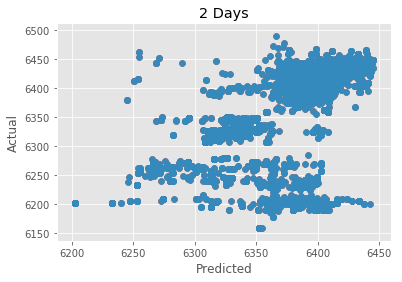

In [23]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model_svr(df1,y1,'rbf')
plt.scatter(Y_predict,Y_test)
plt.scatter(Y_predict,Y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2 Days")

In [18]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model_svr(df1,y1,'linear')
plt.scatter(Y_predict,Y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2 Days")

NameError: name 'fit_model_svr' is not defined